In [28]:
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import numpy as np
import utility as ut
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy import stats
import seaborn as sns
import eulerN as arch 
import torch
from torch import nn
# warnings.filterwarnings('ignore')

In [29]:
Vo = np.load('../data/L96-trajectories/test.npy')[:, :, :221]
L0, L1 = 0.4, 3.5
beta = 3e-9
training_points = 100000
n_repeats = 100
tau_f_kwargs = {'error_threshold' : 0.5, 'dt': 0.01, 'Lyapunov_time': 1/2.27}

In [30]:
D_r, B, batch_size, normalize = 1024, 5, 10, False
Uo = np.load(f'../data/L96-trajectories/train{B}.npy')
drf_args = [D_r, B, L0, L1, Uo, beta, 'EulerN', f"../data/EulerN/L96/depth-{B}/D_r-{D_r}{'' if not normalize else '-normalized'}", normalize]
batch = arch.BatchDeepRF(Uo, Vo, *drf_args)
batch.run(training_points, n_repeats, batch_size, **tau_f_kwargs)

Running experiments for batch 0...
Time taken = 5.50E+01s
Running experiments for batch 1...
Time taken = 5.58E+01s
Running experiments for batch 2...
Time taken = 5.83E+01s
Running experiments for batch 3...
Time taken = 5.56E+01s
Running experiments for batch 4...
Time taken = 5.66E+01s
Running experiments for batch 5...
Time taken = 5.72E+01s
Running experiments for batch 6...
Time taken = 6.23E+01s
Running experiments for batch 7...
Time taken = 5.73E+01s
Running experiments for batch 8...
Time taken = 5.90E+01s
Running experiments for batch 9...
Time taken = 5.78E+01s
Time taken by run is 574.7613 seconds


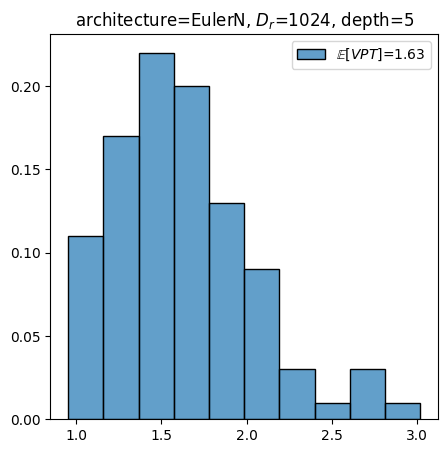

In [32]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
tau_f = batch.get_data()['tau_f_nmse']
sns.histplot(tau_f, ax=ax, label=r'$\mathbb{E}[VPT]$'+f'={tau_f.mean():.2f}', alpha=0.7, stat='probability')
ax.legend()
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title(fr'architecture=EulerN, $D_r$={D_r}, depth={batch.drf.net.B}')
plt.savefig(f'{batch.drf.save_folder}/tau_f_nmse.png', bbox_inches='tight', dpi=300)